**Name: Saira Jabeen, Roll NO: 23-AI-10, Section: A2(B), Subject: Prograamming of AI**

**Question 01: --> Outlier Detection**

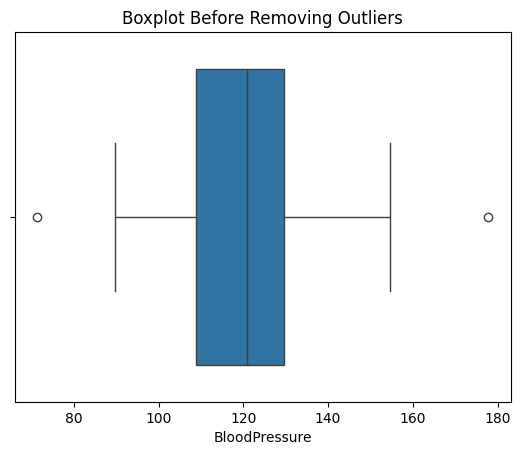

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

p_data = pd.read_csv("patient_data.csv")

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered = data[(data[column] >= lower) & (data[column] <= upper)]
    return filtered, lower, upper

# Before Removing Outlier
sns.boxplot(x=p_data["BloodPressure"])
plt.title("Boxplot Before Removing Outliers")
plt.show()

# Remove outliers
p_data_clean, lower, upper = remove_outliers_iqr(p_data, "BloodPressure")



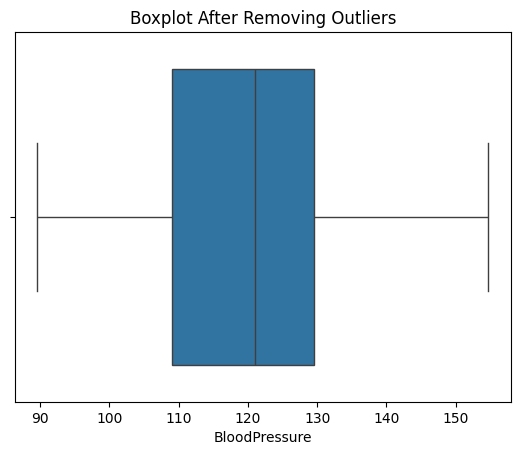

Outliers removed: {len(df) - len(df_clean)}
Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}


In [6]:
# After removing outlier
sns.boxplot(x=p_data_clean["BloodPressure"])
plt.title("Boxplot After Removing Outliers")
plt.show()

print("Outliers removed: {len(df) - len(df_clean)}")
print("Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")


**Question 02: --> Hypothesis Testing**

In [10]:
from scipy import stats

# Sample of 20 from CholesterolLevel column
sample = p_data_clean["CholesterolLevel"].sample(20, random_state=42)
mu_0 = 195

t_stat, p_val = stats.ttest_1samp(sample, mu_0)

print("\n--- One-Sample t-Test: CholesterolLevel ---")
print("H0: Mean = 195")
print("H1: Mean ≠ 195")
print(f"Sample Mean = {sample.mean():.2f}")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_val:.4f}")
print("Conclusion:", "Reject H0" if p_val < 0.05 else "Fail to reject null hypothesis(H0)")



--- One-Sample t-Test: CholesterolLevel ---
H0: Mean = 195
H1: Mean ≠ 195
Sample Mean = 203.91
t-statistic = 1.3952
p-value = 0.1791
Conclusion: Fail to reject null hypothesis(H0)


In [12]:
# Create contingency table
contingency = pd.crosstab(df_clean["Gender"], p_data_clean["RiskCategory"])

# Chi-square test
chi2, p_val2, dof, expected = stats.chi2_contingency(contingency)

print("\n--- Chi-Square Test: Gender vs RiskCategory ---")
print("H0: Gender and RiskCategory are independent")
print("H1: Gender and RiskCategory are associated")
print(f"Chi-square = {chi2:.4f}")
print(f"p-value = {p_val2:.4f}")
print(f"Degrees of Freedom = {dof}")
print("Conclusion:", "Reject H0" if p_val2 < 0.05 else "Fail to reject null hypothesis(H0)")



--- Chi-Square Test: Gender vs RiskCategory ---
H0: Gender and RiskCategory are independent
H1: Gender and RiskCategory are associated
Chi-square = 1.8557
p-value = 0.3954
Degrees of Freedom = 2
Conclusion: Fail to reject null hypothesis(H0)


**Question 03: --> Modeling with first order ODE**

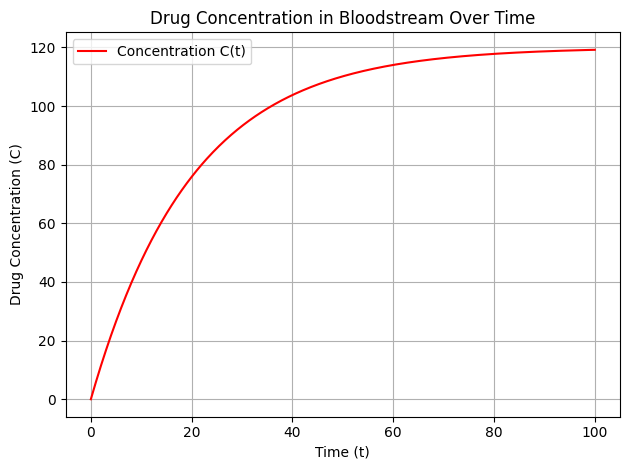

Final concentration at t=100 is: 119.19


In [18]:
import numpy as np
from scipy.integrate import odeint

k = 0.05
D = 120
C0 = 0
t = np.linspace(0, 100, 500)

def model(C, t):
    return k * (D - C)

C = odeint(model, C0, t)

plt.plot(t, C, label='Concentration C(t)', color='red')
plt.xlabel("Time (t)")
plt.ylabel("Drug Concentration (C)")
plt.title("Drug Concentration in Bloodstream Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Final concentration at t=100 is: {C[-1][0]:.2f}")
